# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Registration time (with personal info removed) kept in `personal` folder, survey results under `survey`.

In [2]:
personal = "personal/"
survey = "survey/"
years = [2016, 2017, 2018]

Collect all data into single dataframe `df_personal`

In [3]:
dfs = []
keys = []
for f in glob.glob(personal+'/20*/*_processed.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_personal = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)

Collect all data into single dataframe `df_survey`

In [4]:
df_survey = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
#df_survey.loc["2016-espoo-dec"]
df_survey.head()

What is the <strong>operating system</strong> that you will use during the course (on your laptop)?  \
2017-linkoeping-nov 0                                              Linux                                                    
                    1                                              Linux                                                    
                    2                                              Linux                                                    
                    3                                           Mac OS X                                                    
                    4                                              Linux                                                    

                      Other  \
2017-linkoeping-nov 0   NaN   
                    1   NaN   
                    2   NaN   
                    3   NaN   
                    4   NaN   

                      Which <strong>version</strong> of operating system are you using? If your operating system is Linux, which <strong>distribution</strong> are you using?  \
2017-linkoeping-nov 0                                          Fedora 25                                                                                                        
                    1                                   Ubuntu 16.04 LTS                                                                                                        
                    2                                         Linux mint                                                                                                        
                    3                                             mac os                                                                                                        
                    4                                               Arch                                                                                                        

                      I don't use version control and I don't know what it is  \
2017-linkoeping-nov 0                                                NaN        
                    1  I don't use version control and I don't know w...        
                    2                                                NaN        
                    3                                                NaN        
                    4                                                NaN        

                      I don't use version control but I know what it is  \
2017-linkoeping-nov 0                                               NaN   
                    1                                               NaN   
                    2                                               NaN   
                    3                                               NaN   
                    4                                               NaN   

                      I use version control, but I don't know which system  \
2017-linkoeping-nov 0                                                NaN     
                    1                                                NaN     
                    2                                                NaN     
                    3                                                NaN     
                    4                                                NaN     

                       Git Mercurial Subversion  CVS          ...           \
2017-linkoeping-nov 0  Git       NaN        NaN  NaN          ...            
                    1  NaN       NaN        NaN  NaN          ...            
                    2  Git       NaN        NaN  NaN          ...            
                    3  Git       NaN        NaN  NaN          ...            
                    4  Git       NaN        NaN  NaN          ...            

                       Software licensing  Documentation     Start Date (UTC)  \
2017-linkoeping-nov 0  Software licensing  Documentation  2017-1

#### Cleaning up

Some questions are split over two columns (one containing NaNs for a given workshop)

In [5]:
are_you_dfs = [col for col in df_survey.columns if 'Are you' in col]
df_survey[are_you_dfs].head()

Are you using <strong>automated testing</strong> in your programming project(s)?  \
2017-linkoeping-nov 0                                                Yes                                 
                    1                     No and I don't know what it is                                 
                    2                           No but I know what it is                                 
                    3                           No but I know what it is                                 
                    4                           No but I know what it is                                 

                      Are you using <strong>code coverage analysis</strong> in your programming project(s)?  \
2017-linkoeping-nov 0                     No and I don't know what it is                                      
                    1                     No and I don't know what it is                                      
                    2                     No and I don't know what it is                                      
                    3                     No and I don't know what it is                                      
                    4                           No but I know what it is                                      

                      Are you employing <strong>code review</strong> in your programming project(s)?  \
2017-linkoeping-nov 0                           No but I know what it is                               
                    1                     No and I don't know what it is                               
                    2                           No but I know what it is                               
                    3                     No and I don't know what it is                               
                    4                     No and I don't know what it is                               

                      Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?  \
2017-linkoeping-nov 0       No but I know what at least one of them does                                                                    
                    1                No and I don't know either of those                                                                    
                    2                No and I don't know either of those                                                                    
                    3                No and I don't know either of those                                                                    
                    4        Yes, I use either Travis or Jenkins or both                                                                    

                      Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?  \
2017-linkoeping-nov 0        I know what IDEs are but have not tried any                                                            
                    1  I have tried an IDE but I prefer text editors ...                                                            
                    2  I have tried an IDE but I prefer text editors ...                                                            
                    3  I have tried an IDE but I prefer text editors ...                                                            
                    4  I have tried an IDE but I prefer text editors ...                                                            

                      Are you using <strong>code coverage analysis</strong> in your programming project(s)?  \
2017-linkoeping-nov 0                                                NaN                                      
                    1                                                NaN                                      
                    2                                                NaN                                      
   

These are the duplicate columns:

In [6]:
travis = [df_survey.columns.get_loc(c) for c in df_survey.columns if "Travis or Jenkins" in c]
codecov = [df_survey.columns.get_loc(c) for c in df_survey.columns if "code coverage analysis" in c]
ide = [df_survey.columns.get_loc(c) for c in df_survey.columns if "integrated development environment" in c]

dupl = {"travis":travis, "codecov":codecov, "ide":ide}

Copy from second to first column if value is not NaN

In [7]:
df_survey.iloc[:,dupl["travis"][0]].fillna(df_survey.iloc[:,dupl["travis"][1]], inplace=True)
df_survey.iloc[:,dupl["codecov"][0]].fillna(df_survey.iloc[:,dupl["codecov"][1]], inplace=True)
df_survey.iloc[:,dupl["ide"][0]].fillna(df_survey.iloc[:,dupl["ide"][1]], inplace=True)


Remove reduntant column after copying non-NaN values

In [8]:
rmlist = [x[1] for x in dupl.values()]
df_survey.drop(df_survey.columns[rmlist], axis=1, inplace=True)

### Plot styles

In [9]:
xsize = 8
ysize = 8
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Gender

/Users/ktw/anaconda2/envs/juplab/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


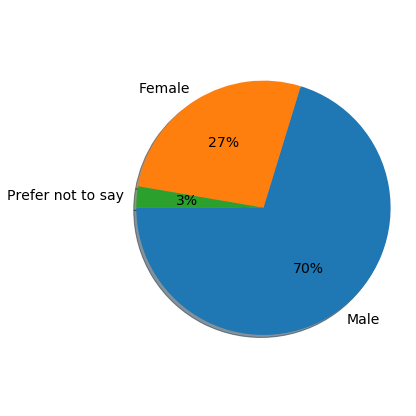

In [10]:
counts = df_personal["Gender"].value_counts()
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/gender.png")


### Operating system

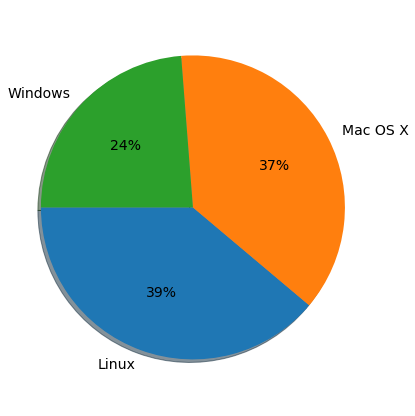

In [11]:
os = 'What is the <strong>operating system</strong> that you will use during the course (on your laptop)?'
counts = df_survey[os].value_counts()
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/operatingsystems.png")


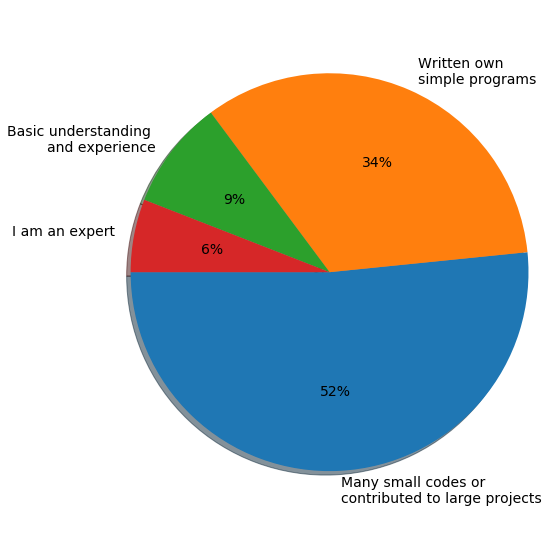

In [12]:
plt.rc('font', **font)
experience='How would you describe your <strong>programming experience</strong>?'
counts = df_survey[experience].value_counts()

# renaming for less cluttering
counts.rename({"I have written many small codes and/or contributed to large complex software": 
                   "Many small codes or \ncontributed to large projects"}, inplace=True)
counts.rename({"I have written my own simple programs": 
                   "Written own \nsimple programs"}, inplace=True)
counts.rename({"Basic understanding and experience, I have looked through code and made minor adjustments": 
                   "Basic understanding \nand experience"}, inplace=True)
counts.rename({"I have no programming experience":
                   "No programming experience"}, inplace=True)

counts.drop(labels="No programming experience", inplace=True)

values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize,ysize))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/programming-experience.png")



In [13]:
version_control = ["I don't use version control and I don't know what it is", 
                   "I don't use version control but I know what it is", 
                   "I use version control, but I don't know which system", 
                   "Git", "Mercurial", "Subversion", "CVS", 
                   "Perforce", "Bazaar"]

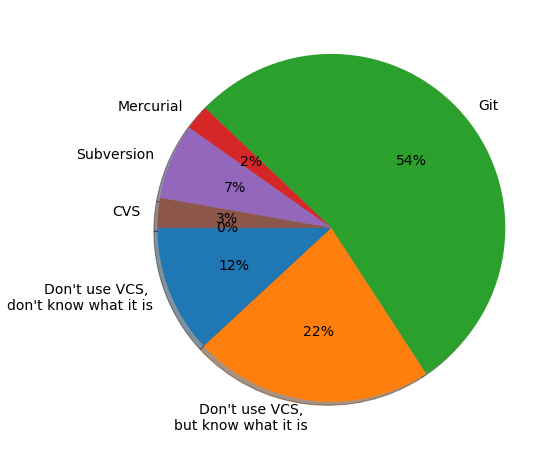

In [14]:
df_versioncontrol = df_survey[version_control] 
data = df_versioncontrol.notna().sum()

# renaming for less cluttering
data.rename({"I don't use version control and I don't know what it is": 
                   "Don't use VCS, \ndon't know what it is"}, inplace=True)
data.rename({"I don't use version control but I know what it is": 
                   "Don't use VCS, \nbut know what it is"}, inplace=True)
data.rename({"I use version control, but I don't know which system": 
                   "Use VCS, but don't know which"}, inplace=True)

# dropping answers below 1%
data.drop(labels="Use VCS, but don't know which", inplace=True)
data.drop(labels="Perforce", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/version-control.png")
plt.show()


In [15]:
languages = sorted(['C', 'C++', 'Fortran 77', 'Fortran 90+', 'Matlab',
            'Python', 'Haskell', 'R', 'Perl', 'Julia', 'Go'])

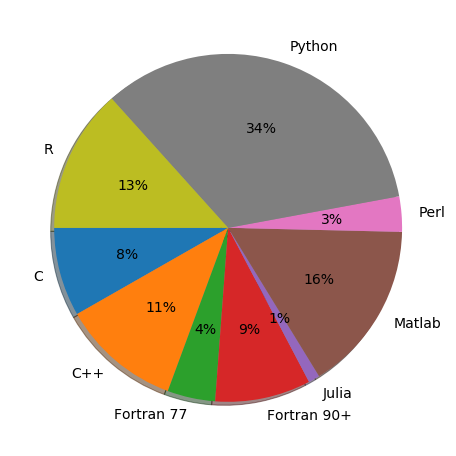

In [16]:
df_languages = df_survey[languages] 
data = df_languages.notna().sum()

# dropping answers below 1%
data.drop(labels="Haskell", inplace=True)
data.drop(labels="Go", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/languages.png")
plt.show()


### Documentation

In [17]:
doc = sorted(["No documentation", "Comments in the source code", 
       "Doxygen", "Wiki", "RST/Sphinx", "Read the Docs", 
       "MkDocs", "PDF", "HMTL", "Markdown", "README files"])

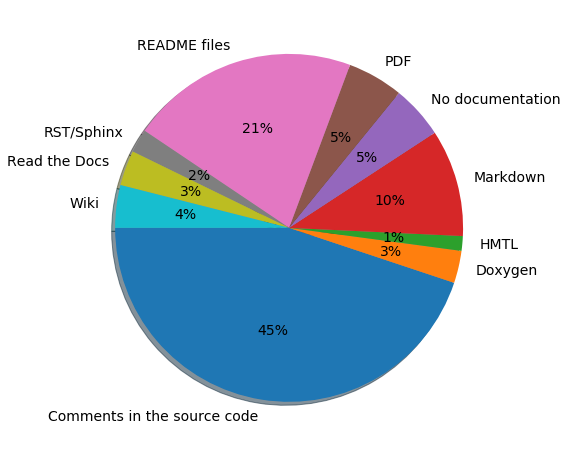

In [18]:
df_doc = df_survey[doc] 
data = df_doc.notna().sum()

# dropping answers below 1%
data.drop(labels="MkDocs", inplace=True)

plt.figure(figsize=(xsize,ysize))
data.plot.pie(autopct='%1.0f%%', shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/documentation.png")
plt.show()